In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv('/media/yesenia/b1a3ddb6-6209-4f7e-8a63-d7de1b9dc692/yesenia/Programming/Proyectos en py/mi_proyecto1/heart_failure_clinical_records_dataset.csv')
print(data.shape)
data.head()

(299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Para ver cuáles de las variables son categóricas y cuáles son numéricas se utiliza el método .info() que muestra la cantidad de valores no nulos de cada columna y el tipo de dato de cada columna. Si el tipo de dato de una columna es int64 o float64 corresponde a una variable numérica, en caso de que corresponda a una variable object corresponde a una variable categórica.

In [18]:
info = data.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**Etapa de limpieza**

Eliminación de datos faltantes

In [6]:
cant_na = data.isna().sum()
data.dropna(inplace=True)
data.info()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float

Eliminación de columnas redundantes. Esta parte del script es pesonalizada para cada problema. Lo que se pudiera generalizar es que si se tienen columnas categóricas se deben eliminar las que tengas un solo subnivel y las columnas numéricas que tengan desviación estándar 0 se eliminan también. Abajo se muestra el código.

In [ ]:
#Conteo de los subniveles de las columnas categóricas#
cols_cat = [] #Se guardan todas las columnas categóricas del dataset#
for col in cols_cat:
    print(f'Columna {col}: {data[col].unique()} subniveles')
    if data[col].unique() == 1:
        data.drop[col]


In [7]:
#Columnas numéricas: eliminación de columnas con desviación estándar 0#
estadisticas = data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Eliminación de filas repetidas

In [8]:
print(f'El tamaño del dataset antes de eliminar las filas repetidas es: {data.shape}')
data.drop_duplicates(inplace = True)
print(f'El tamaño del dataset después de eliminar las filas repetidas es: {data.shape}')

El tamaño del dataset antes de eliminar las filas repetidas es: (299, 13)
El tamaño del dataset después de eliminar las filas repetidas es: (299, 13)


In [9]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Eliminación de outliers en las variables numéricas

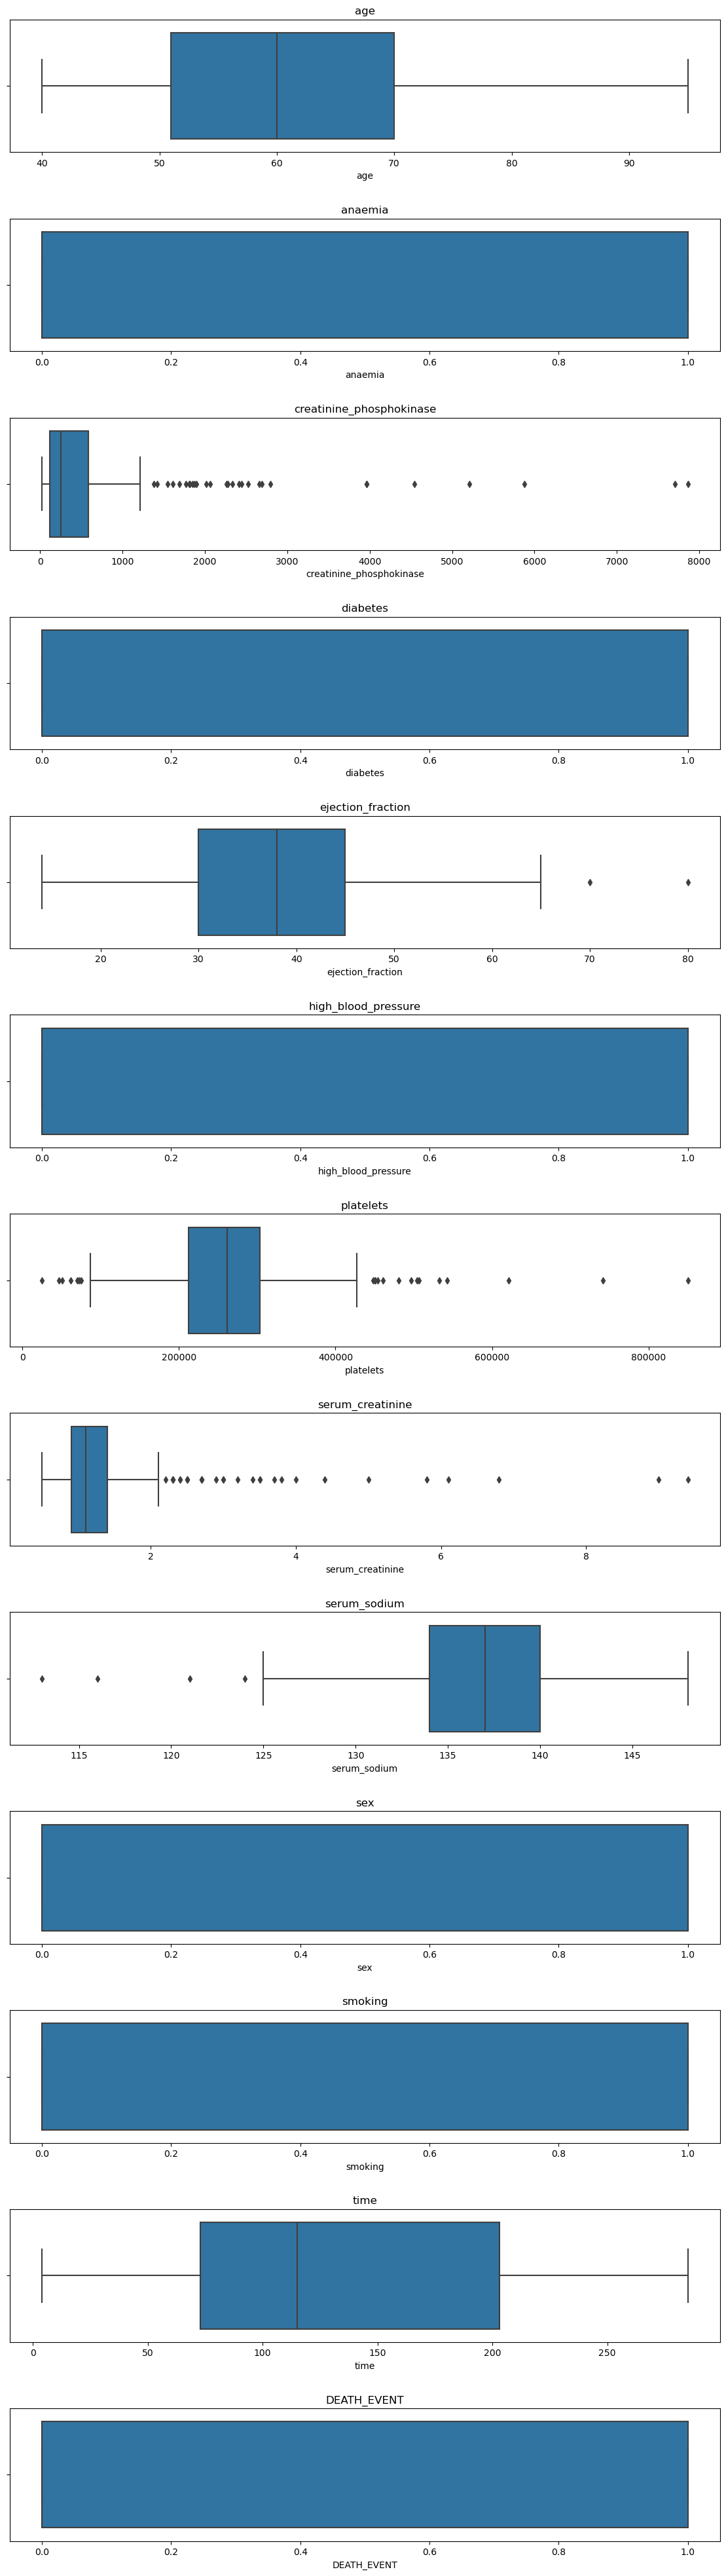

In [ ]:
#Generación de gráficas para visualizar los valores de cada columna de forma individual
cols_num = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT']

fig, ax = plt.subplots(nrows= 13, ncols=1, figsize = (14, 50))
fig.subplots_adjust(hspace=0.5)

for i,col in enumerate (cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)
    
#En base a los resultados de los gráficos entonces se eliminan las filas que contengan outliers.

data = data[data['ejection_fraction'] < 70]    

In [11]:
print(f'Tamaño del dataset  después de eliminar los registros de ejection_fraction:{data.shape}')

Tamaño del dataset  después de eliminar los registros de ejection_fraction:(297, 13)


En las variables categóricas se pueden observar también errores tipográficos, estos consisten en errores en la escritura de la categoría.